- The main aim of this project is to predict a numeric value, and then read and interpreting an image that uses a handwritten font.

In [1]:
# Importing the necessary libraries
#Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score,confusion_matrix

# The digits dataset

- scikit-learn has several datasets perloaded and we can directly download the digits dataset from it.

In [2]:
from sklearn import datasets
digits = datasets.load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
print("Shape of Digits data",digits.data.shape)

Shape of Digits data (1797, 64)


- There are 1797 images of shape 8 x 8.

- Let's look at the first 8x8 image at index zero. Each slot in the array corresponds to a pixel, and the value in the slot is the amount of black in the pixel

In [5]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

- Lets plot the first image

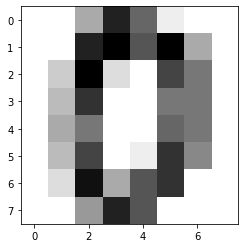

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [7]:
print (digits.target.shape)
print (digits.target)

(1797,)
[0 1 2 ... 8 9 8]


- The above line of code gives us the target attribute. There are 1797 images in a 1D array. 

-  Lets plot some of the digits from our target attribute.

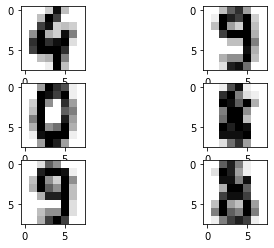

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(321)
plt.imshow(digits.images[1791], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(322)
plt.imshow(digits.images[1792], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(323)
plt.imshow(digits.images[1793], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(324)
plt.imshow(digits.images[1794], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(325)
plt.imshow(digits.images[1795], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(326)
plt.imshow(digits.images[1796], cmap=plt.cm.gray_r,
interpolation='nearest')

- We can observe that while images have been printed,some of the digits have a very poor resolution making it difficult for us to recognize them. In this context, our neural-networks will also perform poorly. So scikit-learn plays a key role in creating, training, and evaluating a neural network. 

- Lets split our data into train,test and validation parts.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [10]:
# Selecting the model 
from sklearn import svm
svc=svm.SVC(gamma=0.001,C=100)

In [11]:
model=svc

In [12]:
# This is for test data
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9916666666666667

In [13]:
y_predict

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
       8, 6, 0, 9, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8, 8, 1, 1, 0, 7, 9, 0, 0,
       8, 7, 2, 7, 4, 3, 4, 3, 4, 0, 4, 7, 0, 5, 5, 5, 2, 1, 7, 0, 5, 1,
       8, 3, 3, 4, 0, 3, 7, 4, 3, 4, 2, 9, 7, 3, 2, 5, 3, 4, 1, 5, 5, 2,
       5, 2, 2, 2, 2, 7, 0, 8, 1, 7, 4, 2, 3, 8, 2, 3, 3, 0, 2, 9, 5, 2,
       3, 2, 8, 1, 1, 9, 1, 2, 0, 4, 8, 5, 4, 4, 7, 6, 7, 6, 6, 1, 7, 5,
       6, 3, 8, 3, 7, 1, 8, 5, 3, 4, 7, 8, 5, 0, 6, 0, 6, 3, 7, 6, 5, 6,
       2, 2, 2, 3, 0, 7, 6, 5, 6, 4, 1, 0, 6, 0, 6, 4, 0, 9, 3, 8, 1, 2,
       3, 1, 9, 0, 7, 6, 2, 9, 3, 5, 3, 4, 6, 3, 3, 7, 4, 9, 2, 7, 6, 1,
       6, 8, 4, 0, 3, 1, 0, 9, 9, 9, 0, 1, 8, 6, 8, 0, 9, 5, 9, 8, 2, 3,
       5, 3, 0, 8, 7, 4, 0, 3, 3, 3, 6, 3, 3, 2, 9, 1, 6, 9, 0, 4, 2, 2,
       7, 9, 1, 6, 7, 6, 3, 9, 1, 9, 3, 4, 0, 6, 4, 8, 5, 3, 6, 3, 1, 4,
       0, 4, 4, 8, 7, 9, 1, 5, 2, 7, 0, 9, 0, 4, 4, 0, 1, 0, 6, 4, 2, 8,
       5, 0, 2, 6, 0, 1, 8, 2, 0, 9, 5, 6, 2, 0, 5,

In [15]:
confusion_matrix(y_test,y_predict)

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 28,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 33]], dtype=int64)

In [16]:
# For validation data
model.fit(X_train,y_train)
y_predict=model.predict(X_val)
accuracy_score(y_predict,y_val)

0.9888888888888889

In [17]:
y_val

array([6, 5, 5, 0, 7, 9, 1, 2, 3, 2, 8, 0, 7, 0, 3, 0, 7, 9, 3, 8, 8, 1,
       2, 7, 2, 6, 8, 5, 6, 2, 5, 5, 6, 5, 7, 3, 0, 8, 9, 4, 5, 2, 8, 5,
       8, 6, 4, 3, 5, 0, 9, 1, 6, 6, 2, 5, 7, 0, 9, 3, 4, 8, 3, 2, 3, 4,
       6, 9, 3, 7, 2, 7, 7, 4, 6, 9, 4, 9, 2, 2, 0, 3, 3, 0, 4, 9, 5, 5,
       0, 3, 5, 7, 5, 0, 5, 6, 8, 2, 4, 6, 9, 4, 2, 3, 4, 7, 6, 1, 9, 8,
       5, 9, 6, 8, 4, 1, 6, 7, 2, 1, 9, 9, 1, 6, 8, 8, 8, 1, 1, 3, 3, 2,
       0, 8, 7, 6, 2, 4, 6, 6, 5, 2, 4, 6, 4, 4, 1, 9, 4, 7, 8, 9, 5, 7,
       8, 9, 9, 7, 9, 3, 2, 0, 3, 8, 0, 8, 3, 7, 8, 1, 5, 3, 4, 5, 6, 9,
       7, 7, 1, 1, 9, 9, 4, 4, 1, 5, 7, 6, 9, 7, 7, 5, 7, 0, 4, 1, 9, 5,
       7, 0, 8, 8, 6, 7, 0, 1, 8, 2, 7, 4, 1, 9, 4, 4, 1, 3, 5, 7, 3, 6,
       9, 9, 7, 8, 8, 9, 6, 1, 0, 2, 7, 8, 9, 3, 6, 0, 2, 4, 4, 0, 7, 8,
       6, 1, 1, 9, 8, 1, 0, 8, 8, 1, 7, 4, 6, 2, 7, 9, 1, 8, 5, 6, 4, 9,
       9, 0, 2, 9, 9, 6, 2, 7, 8, 7, 5, 8, 8, 2, 0, 1, 1, 9, 4, 7, 1, 1,
       3, 4, 6, 7, 7, 0, 0, 1, 2, 6, 5, 5, 9, 0, 5,

In [18]:
confusion_matrix(y_test,y_val)

array([[2, 2, 5, 1, 6, 6, 4, 6, 6, 5],
       [4, 3, 3, 1, 7, 3, 4, 3, 6, 1],
       [2, 2, 3, 3, 5, 3, 3, 5, 4, 6],
       [3, 3, 3, 5, 2, 3, 6, 8, 3, 5],
       [6, 4, 5, 2, 3, 2, 3, 4, 3, 6],
       [5, 2, 1, 6, 1, 8, 2, 1, 0, 4],
       [4, 5, 3, 5, 3, 2, 1, 5, 3, 6],
       [2, 2, 4, 6, 1, 6, 3, 3, 7, 3],
       [4, 3, 1, 1, 3, 1, 6, 4, 2, 4],
       [1, 7, 3, 2, 2, 2, 4, 4, 3, 6]], dtype=int64)

In [19]:
svc.predict(digits.data[1791:1796])

array([4, 9, 0, 8, 9])

# Lets' run this model for few other training and validation sets.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.25, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=10) 

In [21]:
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9866666666666667

In [22]:
y_predict

array([5, 2, 5, 4, 8, 2, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 7, 9, 7, 1, 8,
       6, 7, 8, 8, 5, 2, 5, 9, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 9,
       2, 3, 6, 1, 9, 4, 4, 5, 8, 4, 8, 5, 9, 7, 8, 0, 4, 5, 8, 4, 7, 9,
       0, 7, 1, 3, 9, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 8, 8, 0, 1, 1, 2, 8,
       8, 8, 2, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 0, 8, 0, 4, 8, 8, 0, 6, 7,
       3, 3, 9, 1, 5, 4, 6, 0, 8, 8, 1, 1, 7, 9, 9, 5, 2, 3, 3, 8, 7, 6,
       2, 5, 4, 3, 3, 7, 6, 7, 2, 7, 4, 9, 5, 1, 9, 8, 6, 1, 1, 1, 4, 0,
       8, 9, 1, 2, 3, 5, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 8, 6, 7, 0,
       9, 9, 4, 7, 3, 5, 2, 0, 6, 7, 5, 3, 9, 7, 1, 3, 2, 8, 3, 3, 1, 7,
       1, 1, 1, 7, 1, 6, 7, 6, 9, 5, 2, 3, 5, 2, 9, 5, 4, 8, 2, 9, 1, 5,
       4, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
       4, 4, 9, 7, 5, 6, 1, 8, 7, 0, 8, 6, 2, 0, 1, 2, 3, 8, 4, 4, 3, 5,
       7, 9, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 6, 0, 6, 6, 6, 7, 1, 6, 1, 7,
       6, 0, 6, 3, 7, 4, 6, 2, 8, 0, 8, 4, 7, 3, 3,

In [23]:
confusion_matrix(y_test,y_predict)

array([[45,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 45,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 47,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0, 41,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 47,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 47,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 43,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 47]], dtype=int64)

In [24]:
# For validation data
model.fit(X_train,y_train)
y_predict=model.predict(X_val)
accuracy_score(y_predict,y_val)

0.9851851851851852

In [25]:
y_val

array([5, 1, 4, 2, 4, 1, 4, 6, 4, 6, 5, 5, 3, 4, 9, 6, 5, 9, 7, 3, 2, 2,
       4, 5, 7, 6, 6, 2, 0, 6, 0, 3, 8, 9, 6, 3, 3, 4, 1, 7, 1, 9, 1, 9,
       4, 7, 7, 4, 6, 5, 2, 8, 2, 7, 9, 5, 1, 3, 7, 6, 1, 0, 7, 7, 3, 9,
       7, 7, 3, 6, 9, 8, 4, 0, 8, 4, 5, 8, 4, 2, 8, 5, 1, 5, 3, 1, 0, 3,
       1, 6, 1, 3, 0, 5, 5, 5, 8, 0, 1, 8, 6, 6, 6, 1, 6, 8, 7, 2, 1, 5,
       1, 4, 7, 0, 3, 9, 6, 4, 8, 3, 2, 9, 0, 8, 8, 4, 5, 6, 8, 3, 2, 0,
       1, 0, 2, 1, 5, 3, 4, 1, 2, 8, 8, 0, 9, 9, 9, 4, 3, 0, 2, 6, 4, 6,
       7, 1, 9, 7, 2, 0, 3, 9, 4, 9, 6, 5, 2, 4, 3, 5, 4, 0, 5, 0, 9, 3,
       9, 1, 9, 8, 5, 1, 7, 8, 9, 2, 0, 4, 2, 1, 1, 0, 9, 4, 2, 2, 3, 8,
       3, 8, 6, 5, 7, 3, 2, 3, 6, 1, 6, 3, 8, 6, 5, 1, 2, 5, 0, 7, 7, 0,
       8, 3, 2, 6, 5, 1, 8, 3, 9, 3, 5, 3, 5, 6, 7, 4, 6, 8, 6, 0, 3, 0,
       0, 7, 0, 8, 3, 9, 1, 3, 5, 6, 1, 1, 0, 1, 3, 1, 9, 4, 4, 9, 8, 6,
       2, 2, 4, 7, 4, 5, 8, 3, 4, 7, 7, 2, 5, 5, 2, 4, 3, 9, 2, 5, 7, 5,
       4, 5, 0, 3, 1, 2, 7, 6, 9, 1, 8, 9, 9, 0, 3,

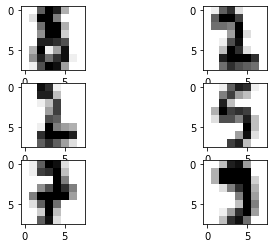

In [28]:
plt.subplot(321)
plt.imshow(digits.images[1781], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(322)
plt.imshow(digits.images[1782], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(323)
plt.imshow(digits.images[1783], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(324)
plt.imshow(digits.images[1784], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(325)
plt.imshow(digits.images[1785], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(326)
plt.imshow(digits.images[1786], cmap=plt.cm.gray_r,
interpolation='nearest')

In [32]:
digits.data[1784]

array([ 0.,  0.,  1., 10., 14., 13.,  1.,  0.,  0.,  0.,  8., 12.,  6.,
        4.,  0.,  0.,  0.,  0., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  5.,
       16., 12., 13., 12.,  0.,  0.,  0.,  2., 11., 11.,  8., 14.,  4.,
        0.,  0.,  0.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
        6., 15.,  2.,  0.,  0.,  0.,  0., 12., 14.,  4.,  0.,  0.])

In [30]:
svc.predict(digits.data[1781:1787])

array([8, 2, 2, 5, 7, 9])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3, random_state=20)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.35, random_state=20) 

In [34]:
# This is for test data
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
accuracy_score(y_test,y_predict)

0.987037037037037

In [35]:
# For validation data
model.fit(X_train,y_train)
y_predict=model.predict(X_val)
accuracy_score(y_predict,y_val)

0.9840909090909091